# Day 08. Exercise 00
# Binary classifier. Logistic regression

## 0. Imports

In [1]:
import requests
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1. Preprocessing

- Get the data from the file [`checker-timestamp.csv`](https://drive.google.com/file/d/1pooM4cITtG249msX3GK_6W0eEiblzAf5/view?usp=sharing).

In [2]:
response = requests.get('https://drive.google.com/u/0/uc?id=1pooM4cITtG249msX3GK_6W0eEiblzAf5&export=download')

with open('../data/checker_timestamp.csv', 'w', encoding='utf-8') as file:
    file.write(response.text)

In [3]:
raw_df = pd.read_csv('../data/checker_timestamp.csv', parse_dates=['timestamp'])
raw_df

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


- Create a dataframe `df` with the columns: `date`, `am`, `pm`, `target`, where `date` is the date of the day, `am` is the number of the commits during the day before midday (integer), `pm` is the number of commits during the day after midday (integer), `target` is weekend/working_day.

In [4]:
# basic group by date and part of time
df = raw_df.groupby(by=[raw_df['timestamp'].dt.date, raw_df['timestamp'].dt.hour >= 12]).count().unstack()

# clean up
df = df.droplevel(0, axis='columns')
df.rename(columns={False: 'am', True: 'pm'}, inplace=True)

# fix index
df.index.name = 'date'
df.index = pd.to_datetime(df.index)

# fill NaN values by zeros
df.fillna(0, inplace=True)

In [5]:
# set up target column
df['target'] = df.reset_index()['date'].dt.weekday.apply(lambda weekday: 'weekend' if weekday > 4 else 'working_day').values

In [6]:
df.head(20)

timestamp,am,pm,target
date,,,
2020-04-17,21.0,2.0,working_day
2020-04-18,1.0,68.0,weekend
2020-04-19,18.0,15.0,weekend
2020-04-20,2.0,23.0,working_day
2020-04-21,0.0,25.0,working_day
2020-04-22,0.0,28.0,working_day
2020-04-23,10.0,33.0,working_day
2020-04-24,2.0,14.0,working_day
2020-04-25,30.0,74.0,weekend


## 2. Exploratory analysis

- Create a plot where `x` is am, `y` is pm, each dot is a day, working days and weekends must have different colors.


- By looking at the graph do you think it will be easy to classify the days having those two features? Put your answer in the markdown cell in the end of that sectioin: "yes, it is easy" or "no, it is not easy".

In [7]:
sns.set(rc = {'figure.figsize':(15,8)})

<AxesSubplot:xlabel='am', ylabel='pm'>

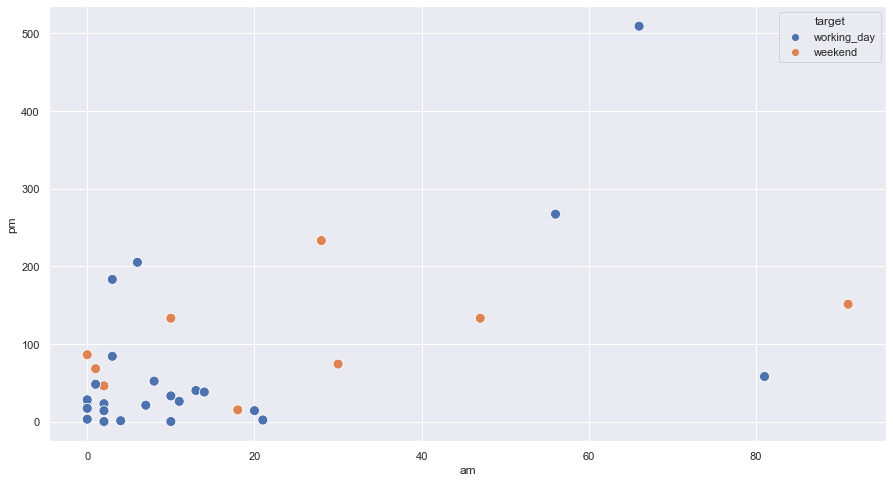

In [8]:
sns.scatterplot(x='am', y='pm', data=df,
                hue='target', s=100
               )

#### No, it is not easy to classify this data

## 3. Logistic regression

- Train logistic regression on your data using `am` and `pm`, parameters are: `random state=21`, `fit_intercept=False`.


- Make predictions for every day of your dataset and add them to your dataframe with the column name `predict`.


- Save the dataframe into a file in the subfolder of the day `data` with the name `am_pm.csv`.


- Draw another plot like you did before, but the color should be taken from the `predict`.


- By looking at the graph do you think if it made good predictions? Put your answer in the markdown cell in the end of that section: "yes, it is good"; "no, it is not good".

### Prepare the data (without split)

In [9]:
feature_cols = ['am', 'pm']
X = df[feature_cols]
y = df['target']

In [10]:
X.head()

timestamp,am,pm
date,,
2020-04-17,21.0,2.0
2020-04-18,1.0,68.0
2020-04-19,18.0,15.0
2020-04-20,2.0,23.0
2020-04-21,0.0,25.0


In [11]:
y.head()

date
2020-04-17    working_day
2020-04-18        weekend
2020-04-19        weekend
2020-04-20    working_day
2020-04-21    working_day
Name: target, dtype: object

### Train the model

In [12]:
logreg = LogisticRegression(random_state=21, fit_intercept=False)

logreg.fit(X, y)

LogisticRegression(fit_intercept=False, random_state=21)

In [13]:
y_pred = logreg.predict(X)

### Save the result to dataframe

In [14]:
df['predict'] = y_pred
df.head(17)

timestamp,am,pm,target,predict
date,,,,
2020-04-17,21.0,2.0,working_day,weekend
2020-04-18,1.0,68.0,weekend,working_day
2020-04-19,18.0,15.0,weekend,working_day
2020-04-20,2.0,23.0,working_day,working_day
2020-04-21,0.0,25.0,working_day,working_day
2020-04-22,0.0,28.0,working_day,working_day
2020-04-23,10.0,33.0,working_day,working_day
2020-04-24,2.0,14.0,working_day,working_day
2020-04-25,30.0,74.0,weekend,working_day


In [15]:
df.to_csv('../data/am_pm.csv')

### Draw the plot

<AxesSubplot:xlabel='am', ylabel='pm'>

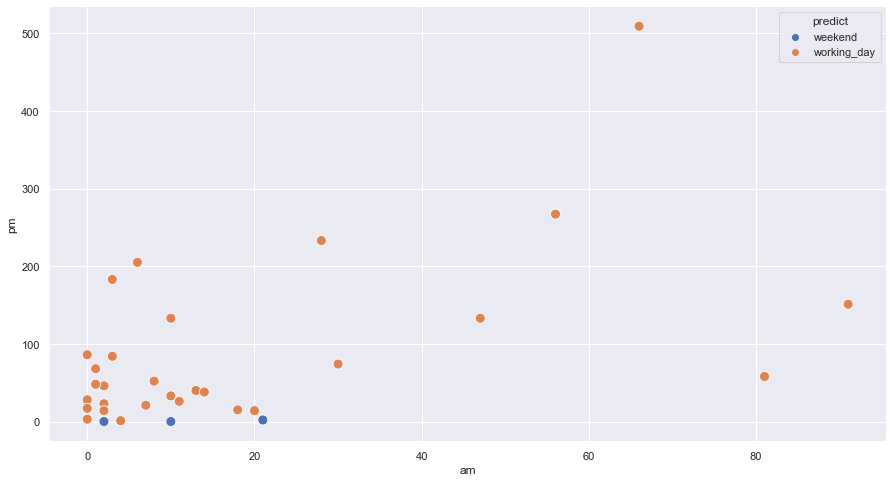

In [16]:
sns.scatterplot(x='am', y='pm', data=df,
                hue='predict', s=100
               )

#### The prediction is not good...

## 4. Evaluation

- Calculate `accuracy` for your predictions.


- Calculate `accuracy` for the naive case when each of your prediction is the value of your most popular class of the day.


- Comparing the accuracies do you think that the classifier made good predictions? Put your answer in the markdown cell in the end of the secion: "yes, it is good"; "no, it is not good".

In [22]:
print("Accuracy:",metrics.accuracy_score(df['target'], df['predict']))

Accuracy: 0.6285714285714286


In [21]:
naive_predict = np.full(df['target'].shape, df['target'].value_counts().idxmax())
print("Accuracy of working days prediction:",metrics.accuracy_score(df['target'], naive_predict))

Accuracy of working days prediction: 0.7142857142857143


#### No, it is not good